Lingyi Xu (lingyix2)     CS398 HW2

# Import Libraries

In [1]:
import h5py
import math
import random
import scipy.sparse

import numpy as np
import matplotlib.pyplot as plt

# Fetch Data

In [2]:
# code from lecture notes
MNIST_data = h5py.File('MNISTdata.hdf5', 'r')
x_train = np.float32(MNIST_data['x_train'][:] )
y_train = np.int32(np.array(MNIST_data['y_train'][:,0]))
x_test = np.float32(MNIST_data['x_test'][:])
y_test = np.int32(np.array(MNIST_data['y_test'][:,0]))

# One_Hot Function for Data Pre-Process

In [3]:
def one_hot(Y):
    m = Y.shape[0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

In [4]:
one_hot_y_test = one_hot(y_test)
one_hot_y_train = one_hot(y_train)

# Parameters for Training

In [176]:
#batch_size
bs = 30
#number of iteration
total_iteration = 14000
#learning rate
ini_lr = 0.25
#hidden size
hs = 128

# Relu Function

In [177]:
def relu(x):     
    return np.maximum(0, x)

# Forward Propagation

In [178]:
def forward_prop(x, w1, w2):
    hidden_output = relu(np.dot(x,w1))
    output = relu(np.dot(hidden_output, w2))
    return(hidden_output, output)

# Define Neural Network

In [183]:
class neural_network():
    def __init__(self,X,y,input_size,hidden_size, output_size,learning_rate=0.1,batch_size=128):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        #initialize the weight matrixes
        self.w1 = np.random.randn(input_size,hidden_size)*0.1
        self.w2 = np.random.randn(hidden_size,output_size)*0.1

    def train(self):
        #Randomly choose a batch from dataset
        n = [random.randint(0,len(self.X)-1) for i in range(self.batch_size)]
        batch_data = self.X[n]
        batch_label = self.y[n]
        #calculate the result of each layer
        hidden_output,output = forward_prop(batch_data, self.w1, self.w2)
        #calculate gradient of w2
        delta = output-batch_label
        grads_w2 = hidden_output.T.dot(delta)
        #calculate gradient of w1
        delta = (hidden_output > 0) * delta.dot(self.w2.T)
        grads_w1 = batch_data.T.dot(delta)
        #update w1 and w2
        self.w1-= lr*(grads_w1/(self.batch_size))
        self.w2-= lr*(grads_w2/(self.batch_size))

    def predict(self, x, y):
        prediction = np.argmax(forward_prop(x, self.w1, self.w2)[-1], axis=1)
        accuracy = np.mean(prediction == np.argmax(y, axis=1))
        return(accuracy)

In [184]:
net_ins = neural_network(x_train,one_hot_y_train,784,hs,10, ini_lr, bs)
accs = np.zeros(int(total_iteration/100))
for i in range(total_iteration):
    #decrease learning rate over time
    lr = ini_lr/(0.001*i+1)
    #start training
    net_ins.train()
    if i%100==0:
        accs[int(i//100)] = net_ins.predict(x_test, one_hot_y_test) 

# Plot the Accuracy vs. Iteration

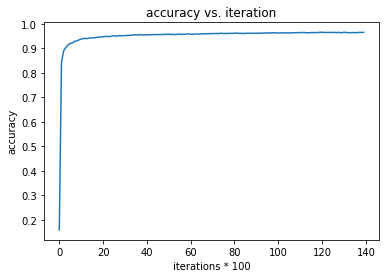

In [185]:
plt.plot(accs)
plt.xlabel("iterations * 100")
plt.ylabel("accuracy")
plt.title("accuracy vs. iteration")
plt.show()

# Print the Final Accuracy

In [186]:
print("final accuracy of test set is:", accs[-1])

final accuracy of test set is: 0.965
